# 회귀 분석

> "작성 중"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [R, statistics]

`-` 2학기 수업에서 배우는 회귀 분석 내용에 대해 간단히 정리할 거임

`-` SAS 와 R을 활용한 선형 회귀분석 참고

# 회귀 분석의 개념 

## 상관 분석(correlation analysis)
`-` 변수들이 얼마만큼의 선형적인 관계가 있는지 분석

`-` 종속변수와 독립변수 고려 X

`-` 측정은 상관계수

## 회귀 분석(regression analysis)
`-` 서로 `인과관계`가 있는 두 변수들 간의 관계식을 분석

`-` 독립변수와 종속변수 고려 O

## 변수 형태
`1.` 연속형(continuous)변수 ---> 키, 몸무게, 수입 등

`2.` 이산형(discrete)변수 ---> 사고 횟수 등

`3.` 범주형(classified)변수 ---> 성별, 교육 수준 등

## 통계적 모형의 종류
`1.` 단순 선형회귀 $y=a+bx+\epsilon$

`2.` 다중 선형회귀 $y=a+b_1x_1+b_2x_2+\cdots+b_kx_k+\epsilon$

`3.` 다항 회귀 $y=a+b_1x+b_2x^2+\cdots+b_nx^k+\epsilon$

`4.` 비선형 회귀 $y=\frac{c}{a-b}(e^{-ax_1}+e^{-bx_2}-e^{-cx_3})+\epsilon$

`5.` 일반화 선형모형 ---> 로지스틱 $y$ : 이항변수, 포아송 회귀 $y$ : 계수변수

`-` 참고 $y=e^{a+bx}$ : 비선형 $\to$ $ln(y) = a+bx$ : 선형

## 회귀 분석의 절차
`1.` 연구목적 ---> 설명변수 선택

`2.` 산점도 ---> 다중공선성, 이상점, 영향점 파악

`3.` 회귀모형 추정 ---> 회귀계수 추정

`-` 이분산 ---> 가중회귀, 다중공선성 ---> Ridge Regression

`4.` 유의한 변수 선택 ---> 회귀 계수 t검정, 변수 선택방법 이용, 수정 결정계수

`5.` 다중공선성 진단 ---> 산점도, VIF, 문제 변수 제거, 주성분 회귀 이용

`6.` 영향점 진단 ---> RSTUDENT, LEVERAGE, DFFITS, COVARTIO, 이상점 제거, 다중회귀에선 영향점도 제거

`7.` 잔차 분석 ---> `잔차와 예측치`의 산점도, 잔차의 정규성 검정

`-` 정규성 가정 이탈: 종속변수를 변환, 등분산 가정 이탈: 가중회귀 방법

`8.` 최종 회귀모형 ---> 추정된 모형 해석, 표준화 회귀계수에 의해 각 설명변수의 영향력 비교

# 단순회귀분석

`-` 회귀분석에 대해 알아보기전 상관분석부터 간단히 살펴보자 

`-` 상관분석은 선형관계의 강도임 + 상관분석과 산점도는 인과관계를 가지지 않음

## 상관관계
`-`  두 개의 양적 변수의 연관강도나 방향을 요약하는 수치 통계량

`-` 상관관계는 두 변수 사이의 선형 관계에 대한 정보임

### 상관계수

`-` 상관관계의 정도를 나타냄

`-` 모집단 상관계수 : $\rho$ ---> 우리가 알고자 하는 모수
{% raw %}

`-` 표본 상관계수 : $r_{xy} = \cfrac{\cfrac{1}{n-1}\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\cfrac{1}{n-1}\sum\limits_{i=1}^{n}(x_i-\bar{x})^{2}\cfrac{1}{n-1}\sum\limits_{i=1}^{n}(y_i-\bar{y})^{2}}} = \cfrac{S_{xy}}{S_x S_y}$

`-` 표본 상관계수(z점수 사용) : $r_{xy} = \cfrac{1}{n-1}\sum\limits_{i=1}^{n}\bigg(\cfrac{x_i-\bar{x}}{\sigma_x}\bigg)\bigg(\cfrac{y_i-\bar{y}}{\sigma_y}\bigg)$

{% endraw %}

#### 상관계수 특징

1. 상관계수는 항상 $-1\leq r \leq 1$

2. $r$의 부호가 두 변수 관계의 방향(음수: 음의 관계, 양수: 양의 관계)

3. $r$이 $-1$ or $+1$에 가까울수록 선형 관계가 강함, $0$에 가까우면 선형 관계가 없음

4. $r$이 $0$이라고 두 변수사이의 관계가 없는 것이 아니라 `선형 관계`가 없다는 의미 --> `곡선 관계`일 수 도 있음

5. 상관계수 $r$은 단위가 없음. 각 변수의 척도와도 무관

6. 상관계수는 대칭적 --> $x$와$y$의 상관계수 $=$ $y$와$x$의 상관계수 

## 단순회귀모형 

`-` 독립변수 $x$와 종속변수 $y$ 사이의 관계를 식으로 나타낸 것 ---> 회귀모형

`-` 독립변수 $x$의 값은 `샘플링`을 하고 나면 고정된 값이므로 하나의 상수임 

`-` 하지만 종속변수 $y$는 주어진 $x$에서 항상 일정하게 측정되지 않음 ---> 측정오차

`-` 단순회귀모형

- $y_i = \beta_0+\beta_1 x_i+\epsilon_i,\quad i=1,2,\cdots,n \\ \qquad 단, \,\epsilon_i \sim i.i.d \quad N(0 ,\sigma^2)$

- $y_i$ : $i$번째 측정된 $y$ 값

- $x_i$ : $i$번째 주어진 고정된 값(= 상수항)

- $\beta_0 ,\beta_1$ : 모집단회귀계수이며 $\beta_0$은 절편이고 $\beta_1$은 기울기

- $\epsilon_i$ : $i$번째 측정된 $y_i$의 오차항

- $E(y)=\beta_0+\beta_1 x, \;Var(y) = \sigma^2$ ---> 당연한 소리(모르겠으면 책보기)

`-` $\epsilon \sim N(0, \sigma^2)$이면 $y \sim N(\beta_0+\beta_1 x, \sigma^2)$

`-` $x$가 확률변수인 경우 사용하면 좋은 대체모형

$$\begin{aligned}y & = \beta_0+\beta_1 x +\epsilon \\
& = (\beta_0 + \beta_1 \bar{x})+(\beta_1 x-\beta_1 \bar{x})+\epsilon \\
& = \beta_{0}\,' + \beta_1(x-\bar{x})+ \epsilon\\
& = \beta_{0}\,' + \beta_1 x' + \epsilon \;(x'=x-\bar{x})\end{aligned}$$

## 회귀선의 추정 

`-` 표본회귀식 $\hat{y} = b_0 +b_1 x$

`-` 잔차 $e_i = y_i - \hat{y_i}$ ---> 잔차는 $e$이고 오차는 $\epsilon$이다

### 함수의 최소값 

`-` 회귀계수를 추정하기 전에 함수의 최소값을 구하는 방법을 알아 보자

`-` 함수 $f(x)$가 있다고 하자. 이 함수의 최소값을 알고 싶다 ---> `미분`

`-` convex fuction (볼록 함수 ---> 아래로 볼록)는 임의의 두 점 $x_1,x_2$와 [0,1] 사이의 값 t에 대해 $f(tx_1+(1-t)x_2)\geq tf(x_1)+(1-t)f(x_2)$가 항상 성립하는 함수

`-` $f''(x) > 0$이면 $f(x)$는 아래로 볼록하다 ---> ex) $y=x^2$

1. 함수를 두 번 미분한다

2. $f''(x)>0$이면 볼록함수이다. ---> $f'(x)=0$을 만족할 때 $f(x)$의 극소값(=최소값)이므로 $f(x)$가 최소이다 

### 최소제곱법

`-` ref : https://bskyvision.com/205 ---> 좋은 자료임 여기에 설명 다 있으니까 이해 안되면 보면서 공부하기

`-` 오차제곱합을 최소로하는 $\beta_0$와 $\beta_1$의 값을 추정값으로 택하는 방법 ---> 편미분을 통해 구함

`-` 편미분 행렬이 양정치이면 $f'(x_i)=0$ 을 만족시키는 점 $x_i$에서 함수는 최소가 됨

`-` 그러면 편미분 행렬이 양정치인지 어떻게 앎? ---> 행렬의 모든 서브행렬들의 행렬식이 $0$보다 크면 양정치

`-` 계산해보면 오차 제곱합 $\sum\limits_{i=1}^{n}\boldsymbol\epsilon^{2}_{i}$ 는 볼록함수임 

- $\boldsymbol{L}  =\sum\limits_{i=1}^{n}\boldsymbol\epsilon^{2}_{i} = \sum\limits_{i=1}^{n}(y_i-\beta_0-\beta_1 x_i)^{2}$

- $\frac{\partial \boldsymbol L}{\partial \beta_0} = -2\sum\limits^{n}_{i=1}(y_i-\beta_0-\beta_1 x_i)$

- $\frac{\partial \boldsymbol L}{\partial \beta_1} = -2\sum\limits^{n}_{i=1}x_i(y_i-\beta_0-\beta_1 x_i)$ 

`-` 정규방정식 ---> 방정식의 해를 구하면 추정값을 구할 수 있음
{% raw %}

- $b_0 n +b_1\sum\limits^{n}_{i=1}x_i=\sum\limits^{n}_{i=1}y_i$

- $b_0\sum\limits^{n}_{i=1}x_i + b_1\sum\limits^{n}_{i=1}x_i^{2} =\sum\limits^{n}_{i=1}x_i y_i$

- $b_1 = \cfrac{\sum\limits^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2} = \cfrac{S_{xy}}{S_{xx}}$

- $b_0 = \bar{y} - b_1 \bar{x}$

{% endraw %}

`-` 대체모형의 회귀직선도 동일함 ---> 과제

### R 예제

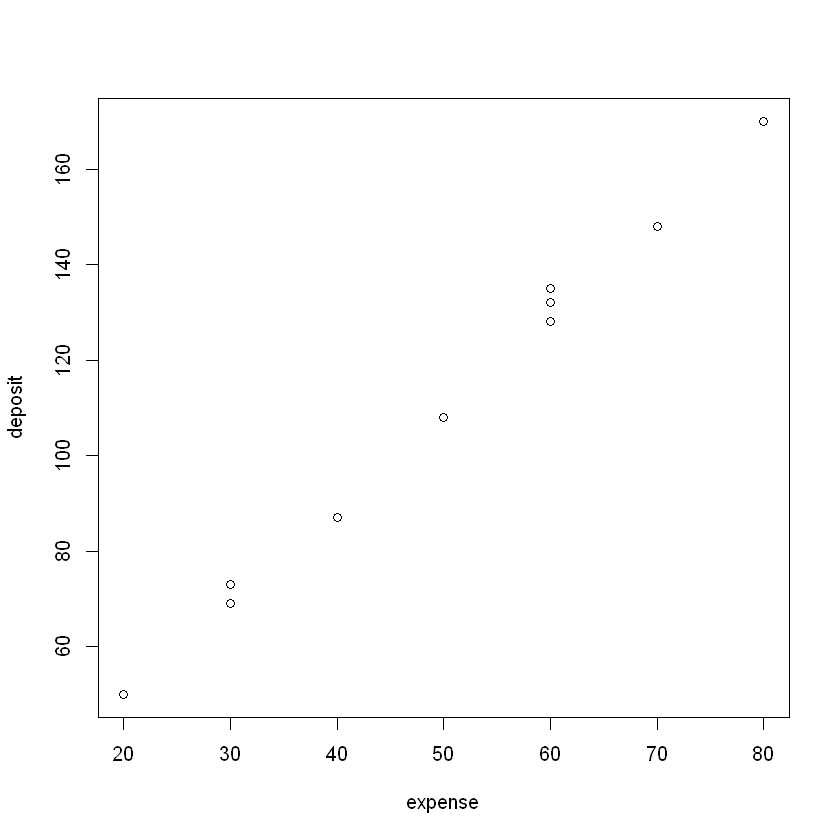

In [42]:
deposit <- c(87 ,108 ,69, 135, 148, 132, 73, 128, 50, 170)
expense <- c(40, 50, 30, 60, 70, 60, 30, 60, 20, 80)

plot(expense, deposit, type = 'p', cex = 1, pch = 1) ## 산점도

`-` 거의 직선관계로 보임

In [37]:
cor(deposit, expense)

[1] 0.9978014

`-` 상관계수는 0.99임

`-` 이제 회귀식을 구해보자

In [40]:
ex3_2_lm <- lm(deposit ~ expense)
summary(ex3_2_lm)


Call:
lm(formula = deposit ~ expense)

Residuals:
   Min     1Q Median     3Q    Max 
  -3.0   -2.0   -0.5    1.5    5.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.00000    2.50294   3.995  0.00398 ** 
expense      2.00000    0.04697  42.583 1.02e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.739 on 8 degrees of freedom
Multiple R-squared:  0.9956,	Adjusted R-squared:  0.9951 
F-statistic:  1813 on 1 and 8 DF,  p-value: 1.02e-10


`-` 추정된 회귀모형 ---> $\hat{y}=10.0+2.0x$

`-` p-값이 매우 작으므로 위 모형은 유의함

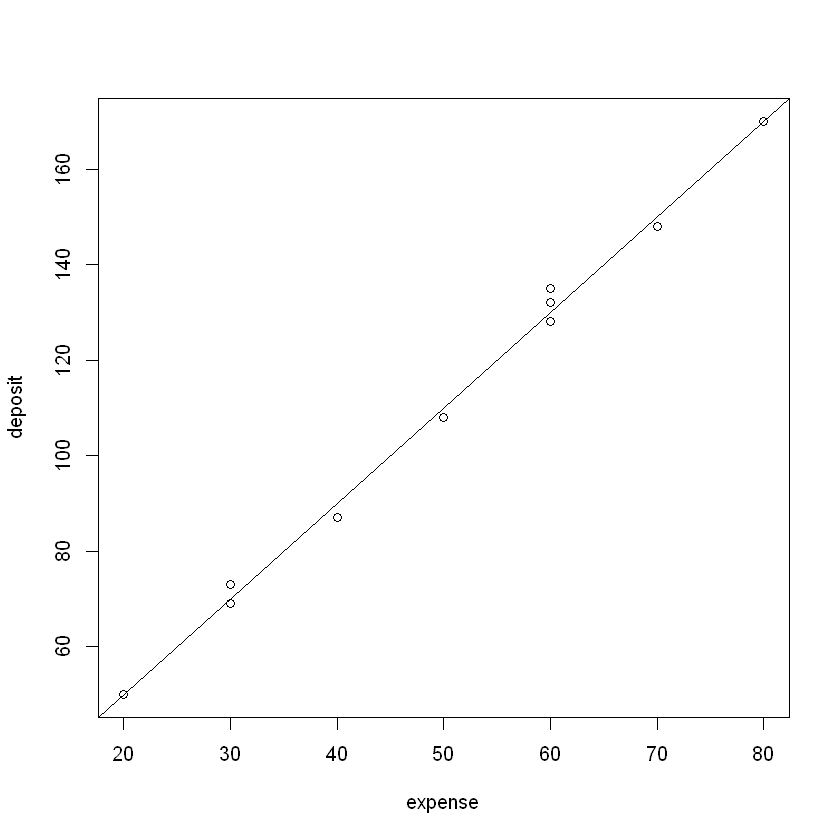

In [43]:
plot(expense, deposit)
abline(ex3_2_lm)

### 최우추정법 

`-` 최우추정법(method of maximum likelihood estimation) : 가능도함수를 최대로 하는 모수를 추정

`-` 가능도함수는 설명 잘된 자료가 많으니 헷갈리면 찾아보기

`-` 간단히 설명해보자 ---> 동전을 $10$번 던져서 앞면이 $7$번 뒷면이 $3$번 나왔다고 하자

`-` 위 경우의 확률은 $_{10\,}\rm C_{\,7} \times 0.5^7 \times 0.5^3$

`-` 조건 : $\epsilon \overset{i.i.d}{\sim} N(0, \sigma^2)$

`-` 최우추정법은 $n$개의 관찰점 $\epsilon_1,\,\epsilon_2,\,\cdots,\,\epsilon_n$의 결합확률분포를 이용

$$ f(\epsilon_i)=\cfrac{1}{\sqrt{2\pi\sigma^2}}exp\bigg(-\cfrac{\epsilon_i^2}{2\sigma^2}\bigg) = \cfrac{1}{\sqrt{2\pi\sigma^2}}exp\bigg(-\cfrac{(y_i-\beta_0-\beta_1x_i)^2}{2\sigma^2}\bigg)$$

`-` $\epsilon_1,\,\epsilon_2,\,\cdots,\,\epsilon_n$은 서로 독립이므로 결합확률밀도함수(joint probability density)는 다음과 같음

`-` ref : https://ko.wikipedia.org/wiki/%EA%B2%B0%ED%95%A9%EB%B6%84%ED%8F%AC

$$ f(\epsilon_1,\,\epsilon_2,\,\cdots,\,\epsilon_n) = \prod\limits_{i=1}^{n}f(\epsilon_i)=\bigg(\cfrac{1}{\sqrt{2\pi\sigma^2}}\bigg)^{n}exp\bigg(-\cfrac{(y_i-\beta_0-\beta_1x_i)^2}{2\sigma^2}\bigg)$$

`-` $\epsilon_1,\,\epsilon_2,\,\cdots,\,\epsilon_n$이 주어졌을 때 $f(\epsilon_1,\,\epsilon_2,\,\cdots,\,\epsilon_n)$를 모수 $\beta_0,\,\beta_1,\,\sigma^2$의 함수로 생각 가능 ---> 가능도함수($\boldsymbol{L}$)

$$\boldsymbol{L}=\boldsymbol{L}(\beta_0,\,\beta_1,\,\sigma^2;\epsilon_1,\,\epsilon_2,\,\cdots,\,\epsilon_n)=\bigg(\cfrac{1}{\sqrt{2\pi\sigma^2}}\bigg)^{n}exp\bigg(-\cfrac{(y_i-\beta_0-\beta_1x_i)^2}{2\sigma^2}\bigg)$$

`-` 최우추정량(maximum likelihood estimator) : 가능도함수를 최대로 하는 $\beta_0,\,\beta_1,\,\sigma\,(\sigma$를 모르는 경우)

`-` 계산을 편리하게 하기 위해 로그를 씌우자

$$ln\,\boldsymbol{L}=-\frac{n}{2}ln\,2\pi\sigma^2 - \frac{1}{2\sigma^2}\sum\limits_{i=1}^{n}(y_i-\beta_0-\beta_1 x_i)^{2}$$

`-` 로그함수는 단조증가함수이기 때문에 가능도함수 값이 커지면 로그가능도함수 값도 항상 커짐

`-` 즉 가능도함수와 극값과 로그가능도함수의 극값이 동일함

`-` 이제 $\beta_0,\,\beta_1,\,\sigma^2$으로 각각 편미분한 식이 $0$ 되도록 해주는 $\beta_0,\,\beta_1,\,\sigma^2$를 구하자

$$\begin{aligned}\frac{\partial \boldsymbol L}{\partial \beta_0} & = -\frac{1}{\sigma^2}\sum\limits^{n}_{i=1}(y_i-\beta_0-\beta_1 x_i)=0\\
\frac{\partial \boldsymbol L}{\partial \beta_1} & = \frac{1}{\sigma^2}\sum\limits^{n}_{i=1}x_i(y_i-\beta_0-\beta_1 x_i)=0\\
\frac{\partial \boldsymbol L}{\partial \beta_1} & = -\frac{n}{2\sigma^2}+\frac{1}{2\sigma^4}\sum\limits^{n}_{i=1}x_i(y_i-\beta_0-\beta_1 x_i)=0\end{aligned}$$

`-` 계산해보면 최우추정량과 최소제곱추정량이 동일함을 알 수 있음

$$b_1 = \cfrac{\sum\limits^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2} = \cfrac{S_{xy}}{S_{xx}}$$

$$b_0 = \bar{y} - b_1 \bar{x}$$

$$\sigma^2=\frac{1}{n}\sum\limits_{i=1}^{n}e^2_i$$

`-` 주의할 점은 최우추정량은 오차항의 정규성 가정하에 얻어진 추정량임

`-` 최소제곱추정량은 오차항의 가정에 관계없이 얻어진 추정량

### 회귀선의 특징

`-` 회귀계수 $\beta_0, \,\beta_1$의 최소제곱추정량 $b_0,\,b_1$은 최량선형불편추정량(best linear unbiased estimator : BLUE)임을 고려하자

`-` `최량선형불편추정량(BLUE)` : 모든 추정량 중에서 관측값들의 `선형결합`으로 이루어진 추정량이고 `불편성`을 만족하며 `최소분산`을 갖는 추정량

`-` 선형결합은 통계수학 교재 참고하자

#### $b_0,\,b_1$의 선형성 

`-` $b_0,\,b_1$이 $y_i$의 선형함수가 됨을 확인하자

$$b_1 = \cfrac{\sum\limits^{n}_{i=1}(x_i - \bar{x})(y_i - \bar{y})}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2}
= \cfrac{\sum\limits^{n}_{i=1}(x_i - \bar{x})y_i}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2}-\cfrac{\bar{y}\sum\limits^{n}_{i=1}(x_i - \bar{x})}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2}$$

> Note: $\sum\limits^{n}_{i=1}(x_i-\bar{x})=x_1+x_2+\cdots+x_{n-1}+x_n - n\bar{x}=0$

$$w_i=\cfrac{(x_i-\bar{x})}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2}$$라고 하면 다음과 같은 식이 주어짐 $$b_1=\sum\limits^{n}_{i=1}w_iy_i$$

`-` $w_i$는 주어진 표본 $x_i$와 $\bar{x}$에 대한 식이므로 고정된 상수임

`-` 그러므로 $b_1$은 $y_i$의 선형함수가 됨

`-` 같은 방법으로 $b_0$에 대해서 계산하자

$$\begin{aligned}b_0 & =\bar{y}-b_1\bar{x}\\[10pt]
& =\frac{1}{n}\sum\limits^{n}_{i=1}y_i-\bigg(\sum\limits^{n}_{i=1}w_iy_i\bigg)\bar{x}\\
& =\sum\limits^{n}_{i=1}\bigg(\frac{1}{n}-w_i\bar{x}\bigg)y_i\end{aligned}$$

#### $b_0,\,b_1$의 불편성

`-` $E(b_0)=\beta_0,\,E(b_1)=\beta_1$이 성립하면 $b_0,\,b_1$은 $\beta_0,\,\beta_1$의 불편추정량임

`-` 대체모형으로 회귀직선을 나타냄

`-` $\sum$ 밖(왼쪽)으로 관련 변수가 나가는 것 만 아니면 변수의 위치는 어디든 상관없음   

$$\begin{aligned}E(b_1) & =E(\sum\limits_{i=1}^{n}w_i y_y)\\
& = \sum\limits_{i=1}^{n}w_i E(y_i)  = \sum\limits_{i=1}^{n}w_i E[\beta_0\,'+\beta_1(x_i-\bar{x}+\epsilon_i]\\
& = \beta_{0}\,'\sum\limits_{i=1}^{n}w_i + \beta_1\sum\limits_{i=1}^{n}w_i(x_i-\bar{x})\end{aligned}$$


> Note: $\sum\limits_{i=1}^{n} w_i = \sum\limits_{i=1}^{n}\left(\cfrac{(x_i-\bar{x})}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2}\right) =\sum\limits_{i=1}^{n}\left(\cfrac{(x_i-\bar{x})}{k}\right)=\cfrac{1}{k}\sum\limits_{i=1}^{n}\left(x_i-\bar{x}\right)=0$

> Note: $\sum\limits_{i=1}^{n}w_i(x_i -\bar{x})= \sum\limits_{i=1}^{n}\left(\cfrac{(x_i-\bar{x})^2}{\sum\limits^{n}_{i=1}(x_i-\bar{x})^2}\right)=\sum\limits_{i=1}^{n}\left(\cfrac{(x_i-\bar{x})^2}{k}\right)=\cfrac{1}{k}\times k = 1$

$$E(b_1)=\beta_1$$

`-` 따라서 $b_1$은 $\beta_1$의 불편추정량임

`-` 이제 $b_0$의 기댓값을 구해보자

> Note: $b_0=\bar{y}-b_1\bar{x}$

$$\begin{aligned}E(b_0) & = E(\bar{y})-E(b_1\bar{x})\\
& = (\beta_0+\beta_1\bar{x})-\bar{x}E(b_1)\\
&=\beta_0\end{aligned}$$

`-` 따라서 $b_0$는 $\beta_0$의 불편추정량임

#### $b_0,\,b_1$의 최소분산성

`-` 교재를 참고하자

### 분산 $\sigma^2$의 추정 

`-` 회귀모형의 오차항 $\epsilon$ 의 분산 $\sigma^2$은 알려져 있지 않은 경우가 많음

`-` 오차항의 분산은 관측값 $y$의 분산과 동일함

`-` $y$의 분산이 크면 회귀선에서 관측값이 멀리 떨어져 있음

`-` $y$의 분산이 작으면 관측값이 회귀선 주위에 모여 있음

`-` 즉 분산 $\sigma^2$은 회귀직선과 관측값 사이의 차이(간격)이다

$$ e_i=y_i-\hat{y}_i$$

> Note: $s^2=\cfrac{1}{n-1}\sum\limits^{n}_{i=1}(x_i-\bar{x})^2$

$$SSE = \sum\limits_{i=1}^{n}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}(y_i-b_0-b_1x_i)^2$$

`-` SSE의 자유도는 $n-2$ ---> 추정값 : $b_0$(절편), $b_1$(기울기)

$$MSE=\cfrac{SSE}{n-2}=\cfrac{\sum\limits_{i=1}^{n}(y_i-\hat{y}_i)^2}{n-2}=\cfrac{\sum\limits_{i=1}^{n}(y_i-b_0-b_1x_i)^2}{n-2}$$

`-` MSE는 $\sigma^2$의 불편추정량임(증명은 교재 참고) ---> $E(MSE)=\sigma^2$

$$\hat{\sigma}=\sqrt{MSE}$$

# 단순회귀모형에 관한 추론

## 구간추정 

### $\beta_1$의 신뢰구간